# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with Credit Card Approval Data

### <p style="text-align: right;"> &#9989; Varsha Ganapathy</p>
### <p style="text-align: right;"> &#9989; varshasg</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/3807174/6598147/ab3c96d720559e8bff08d02bd035f93c/dataset-cover.jpg?t=2023-10-03-01-37-20" width=400px align="right" style="margin-left: 20px" alt="Underwater naval mines">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Train a perceptron and compare to SVC model

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **62 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Friday, April 12. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [37]:
# Put all necessary imports here
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score as acc_score

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-s24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s24-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository.

3. Create a **new branch** called `hw04_branch`.

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```bash
#git clone https://github.com/varshasg/CMSE202-s23-turnin/tree/hw04_branch/hw-04
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s24-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## Part 2. Loading a the dataset: Credit card approval data (7 points)

The dataset contains information about individuals and whether they were approved or rejected for a credit card application. You can think of this approval or rejection as **binary classification**.

The goal of this assignment is to use this dataset to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class. Since the goal of the assignment is to develop models, we have done most of the pre-processing of the data for you (isolating numeric columns, rescaling the data with `StandardScalar`), with the exception of leaving it to you to remove some missing values as we have done in class. 
 
#### The data

**&#9989; Do This:**  To get started, you'll need to download the associated `cc_data.csv` file:
`https://raw.githubusercontent.com/yangy5/HWFiles/main/cc_data.csv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense of the information it contains.** If you are curious about this dataset it came from the following link [CC Approval Data](https://www.kaggle.com/datasets/youssefaboelwafa/credit-card-approval/data).

### 2.1 Load the data

**&#9989; Task 2.1 (2 point):** Read the ```cc_data.csv``` file into your notebook and drop the missing values. The missing values contain "?". We're going to use "class" column as the classes that we'll be trying to predict with our classification models.

Once you've loaded in the data and dropped the missing data, **display the DataFrame to make sure it looks reasonable**. You should have **7 columns** and **666 rows**.

In [5]:
# Put your code here
df = pd.read_csv("cc_data.csv")
cc = df.replace("?", pd.NA).dropna()
cc

,var1,var2,var3,var4,var5,var6,class
0,-0.06173102354640747,-0.955920,-0.290872,-0.287892,0.1034783002693444,-0.195272,+
1,2.266444267315627,-0.060007,0.244013,0.740293,-0.8113307237034743,-0.087788,+
2,-0.5910898450678396,-0.855481,-0.216167,-0.493529,0.5522525384446895,-0.037117,+
3,-0.312611981613437,-0.646569,0.456175,0.534656,-0.48338031888302985,-0.194696,+
4,-0.9531946945445854,0.174015,-0.153415,-0.493529,-0.3683100014021721,-0.195272,+
...,...,...,...,...,...,...,...
685,-0.8770941372642533,1.069928,-0.290872,-0.493529,0.43718222096383175,-0.195272,-
686,-0.7441272294887274,-0.805262,-0.066758,-0.082255,0.09197126852125864,-0.119649,-
687,-0.5283696055510823,1.755924,-0.066758,-0.287892,0.09197126852125864,-0.195080,-
688,-1.1413554130948576,-0.914740,-0.652442,-0.493529,0.5522525384446895,-0.051321,-


### 2.2 Relabeling the classes

To simplify the process of modeling the credit card approval data, we should convert the class labels from strings to integers. For example, rather than `+`, we can consider this to be class "`1`".

**&#9989; Task 2.2 (2 points):** Replace all of the strings in your "Class" column with integers based on the following:

| original label | replaced label |
| -------- | -------- |
| + | 1 |
| - | 0 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [7]:
# Put your code here
cc['class'] = cc['class'].replace({'+': 1, '-': 0})
cc

,var1,var2,var3,var4,var5,var6,class
0,-0.06173102354640747,-0.955920,-0.290872,-0.287892,0.1034783002693444,-0.195272,1
1,2.266444267315627,-0.060007,0.244013,0.740293,-0.8113307237034743,-0.087788,1
2,-0.5910898450678396,-0.855481,-0.216167,-0.493529,0.5522525384446895,-0.037117,1
3,-0.312611981613437,-0.646569,0.456175,0.534656,-0.48338031888302985,-0.194696,1
4,-0.9531946945445854,0.174015,-0.153415,-0.493529,-0.3683100014021721,-0.195272,1
...,...,...,...,...,...,...,...
685,-0.8770941372642533,1.069928,-0.290872,-0.493529,0.43718222096383175,-0.195272,0
686,-0.7441272294887274,-0.805262,-0.066758,-0.082255,0.09197126852125864,-0.119649,0
687,-0.5283696055510823,1.755924,-0.066758,-0.287892,0.09197126852125864,-0.195080,0
688,-1.1413554130948576,-0.914740,-0.652442,-0.493529,0.5522525384446895,-0.051321,0


### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the credit card approval features, and one called `labels`, which contains all of the *new* approval integer labels you just created. **Display both of these new DataFrames to make sure they look correct.**

In [9]:
# Put your code here
features = cc.drop(columns=['class'])
labels = cc['class']
print("features:",features)
print("labels:",labels)

features:                      var1      var2      var3      var4                  var5  \
0    -0.06173102354640747 -0.955920 -0.290872 -0.287892    0.1034783002693444   
1       2.266444267315627 -0.060007  0.244013  0.740293   -0.8113307237034743   
2     -0.5910898450678396 -0.855481 -0.216167 -0.493529    0.5522525384446895   
3      -0.312611981613437 -0.646569  0.456175  0.534656  -0.48338031888302985   
4     -0.9531946945445854  0.174015 -0.153415 -0.493529   -0.3683100014021721   
..                    ...       ...       ...       ...                   ...   
685   -0.8770941372642533  1.069928 -0.290872 -0.493529   0.43718222096383175   
686   -0.7441272294887274 -0.805262 -0.066758 -0.082255   0.09197126852125864   
687   -0.5283696055510823  1.755924 -0.066758 -0.287892   0.09197126852125864   
688   -1.1413554130948576 -0.914740 -0.652442 -0.493529    0.5522525384446895   
689   0.28699350816676367 -0.277959  1.812810 -0.493529   -1.0587319062873184   

         var6  
0

&#9989; **Question 2.1 (1 point):** How balanced are the classes? Does it matter for the set of classes to be balanced? Why or why not? (Include the code you used to determine this along with your written answer below.)

<font size=+3>&#9998;</font> The classes are very well balanced, which matters because classes that are very imbalanced can lead to bias within the model.

In [10]:
print(labels.value_counts(normalize=True))

0    0.551051
1    0.448949
Name: class, dtype: float64


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Building an SVC model (5 points)

Now, to tackle this classification problem, we will use a support vector machine. Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a linear kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (2 point):** Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility , set the `random_state` argument to `1`. Print the lengths to show you have the right number of entries.

In [12]:
# Put your code here
x = features
y = labels

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 532
Testing set: 134


### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (2 points):** Build a **sigmoid** kernel SVC model with `C=10.0`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [19]:
# Put your code here
svcmodel = SVC(kernel='sigmoid', C=10.0, random_state=1)
svcmodel.fit(x_train, y_train)
yprediction = svcmodel.predict(x_test)

confusion = confusion_matrix(y_test, yprediction)
classreport = classification_report(y_test, yprediction)

print("Confusion matrix:", confusion)
print("Classification report:", classreport)

Confusion matrix: [[51 25]
 [16 42]]
Classification report:               precision    recall  f1-score   support

           0       0.76      0.67      0.71        76
           1       0.63      0.72      0.67        58

    accuracy                           0.69       134
   macro avg       0.69      0.70      0.69       134
weighted avg       0.70      0.69      0.70       134



&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

<font size=+3>&#9998;</font> My model has an accuracy frequency of about 69% according to the classification report, making it fairly accurate. According to the confusion matrix, my model predicts 25 false positives and 16 false negatives.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. 


### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0` and `gamma` = `0.01`, `0.1`, `1.0`, `10.0` for a `linear`, `rbf`, and `sigmoid` kernels use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information). Note that this code could take a while to run since it is repeatedly training your SVM. 

In [18]:
# Put your code here
param_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
              'gamma': [0.01, 0.1, 1.0, 10.0],
              'kernel': ['linear', 'rbf', 'sigmoid']}

svc = SVC(random_state=1)

gridsearch = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
gridsearch.fit(x_train, y_train)
print("Best parameters:", gridsearch.best_params_)

Best parameters: {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


&#9989; **Question 4.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> Yes, the hyperparameters have changed; where in part 3 we used a C value of 10.0, we now see that the best parameters result gives us an "optimal" C value of 100.0, as well as a gamma value of 0.1. We now are also being given an rbf kernel as the best parameter to use while in part 3 we used a sigmoid kernel. 

### 4.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [21]:
# Put your code here
bestmodel = SVC(kernel='rbf', C=100.0, gamma=0.1, random_state=1)
bestmodel.fit(x_train, y_train)
bestyprediction = bestmodel.predict(x_test)

bestconfusion = confusion_matrix(y_test, bestyprediction)
bestclassreport = classification_report(y_test, bestyprediction)

# Print the confusion matrix and classification report
print("Confusion Matrix:\n", bestconfusion)
print("\nClassification Report:\n", bestclassreport)

Confusion Matrix:
 [[66 10]
 [21 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        76
           1       0.79      0.64      0.70        58

    accuracy                           0.77       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.77      0.76       134



&#9989; **Question 4.2 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font> This "best" model has an accuracy frequency of about 77% according to the classification report, making it mostly accurate and more accurate than the model from part 3. According to the confusion matrix, my model predicts 10 false positives and 21 false negatives.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## Part 5. Using Principal Components (10 points)

The full model uses all 6 features to predict the results and you likely found that the model is decently accurate using all 6 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective.

### 5.1 Running a Principle Component Analysis (PCA)

Since we have 6 total features to start with, let's see how well we can do if only use 1/3 as many features. Reduce the feature count to **2** principle components. We'll see how well we can predict the classes of the credit card approval dataset with just **2 features**!

**&#9989; Task 5.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 2 components. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [23]:
# Put your code here
pca = PCA(n_components=2)
x_trainpca = pca.fit_transform(x_train)
x_testpca = pca.transform(x_test)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.33546894 0.1830097 ]


&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 2-component PCA? (e.g. sum up the explained variance from all 2 components) How well do you think a model with this many feature will perform? Why?

<font size=+3>&#9998;</font> The total explained variance ratio = 0.33546894 + 0.1830097 = 0.51847864. This means that around 51.85% of the variance in data is caught by the two principal components. It provides a decent level of accuracy, but may perform better with more features.

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [24]:
# Put your code here
gridsearchpca = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
gridsearchpca.fit(x_trainpca, y_train)

print("Best parameters:", gridsearchpca.best_params_)

ypredictionpca = gridsearchpca.predict(x_testpca)

confusionpca = confusion_matrix(y_test, ypredictionpca)
classreportpca = classification_report(y_test, ypredictionpca)

print("Confusion matrix:", confusionpca)
print("Classification report:", classreportpca)

Best parameters: {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}
Confusion matrix: [[56 20]
 [18 40]]
Classification report:               precision    recall  f1-score   support

           0       0.76      0.74      0.75        76
           1       0.67      0.69      0.68        58

    accuracy                           0.72       134
   macro avg       0.71      0.71      0.71       134
weighted avg       0.72      0.72      0.72       134



&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model?

<font size=+3>&#9998;</font> This model has an accuracy frequency of about 72% according to the classification report, making it mostly accurate. According to the confusion matrix, my model predicts 20 false positives and 18 false negatives. This model has a slightly lower accuracy rate than the full feature model, as well as predicting more false positives and false negatives than the full feature model. It is not a significant difference but does prove the full feature model slightly more accurate.

### 5.3 Repeat your analysis with more components

You probably found that the model with 2 features didn't actually do too bad, which is great given how few features we're using, but it's still not as good as just using all of the feature. Can we do better?

What if we increase the number of principle components to **4** (2/3 of the original feature count)? What happens now?

**&#9989; Task 5.3 (2 points):** Repeat your analysis from 5.1 and 5.2 using **4 components** instead. As part of your analysis, **print the total explained variance ratio for both components as well as the sum of these values**.

In [25]:
# Put your code here
pca4 = PCA(n_components=4)

xtrainpca4 = pca4.fit_transform(x_train)
xtestpca4 = pca4.transform(x_test)

evr4 = pca4.explained_variance_ratio_
print("Explained variance ratio:", evr4)
print("Total explained variance ratio:", sum(evr4))

gridsearchpca4 = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
gridsearchpca4.fit(xtrainpca4, y_train)
print("Best parameters:", gridsearchpca4.best_params_)

yprediction4 = gridsearchpca4.predict(xtestpca4)

confusion4 = confusion_matrix(y_test, yprediction4)
classreport4 = classification_report(y_test, yprediction4)
print("Confusion matrix:", confusion4)
print("Classification report:", classreport4)

Explained variance ratio: [0.33546894 0.1830097  0.15763395 0.13927241]
Total explained variance ratio: 0.8153850044810051
Best parameters: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
Confusion matrix: [[68  8]
 [23 35]]
Classification report:               precision    recall  f1-score   support

           0       0.75      0.89      0.81        76
           1       0.81      0.60      0.69        58

    accuracy                           0.77       134
   macro avg       0.78      0.75      0.75       134
weighted avg       0.78      0.77      0.76       134



&#9989; **Question 5.3 (1 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 2 PCA component model? To the full feature model?

<font size=+3>&#9998;</font>This PCA model has an accuracy frequency of about 81.5% according to the classification report, making it the most accurate so far. According to the confusion matrix, my model predicts 8 false positives and 23 false negatives. This model has a higher accuracy rate than both the PCA model with two components as well as the full feature model, but with similar amounts of false positives and false negatives as the other 2 models. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Part 6. How well does PCA work? (14 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a relatively small dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [33]:
# Put your code here
def accuracy(components, x_train, x_test, y_train, y_test):
    pca = PCA(n_components=components)
    
    xtrainpca = pca.fit_transform(x_train)
    xtestpca = pca.transform(x_test)
    
    svc = SVC()
    svc.fit(xtrainpca, y_train)
    yprediction = svc.predict(xtestpca)
    
    accuracyscore = acc_score(y_test, yprediction)
    
    totalevr = sum(pca.explained_variance_ratio_)
    
    return accuracyscore, totalevr

### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** Going from **1 to 6** components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

**Note**: you'll be running many grid searches to do this, so it might take your computer a bit of time to run all of these models. Please be patient. It shouldn't more than a couple minutes!

In [35]:
# Put your code here
num_components = range(1, 7)
accuracyscores = []
evrs = []

for i in num_components:
    accuracyscore, explained_variance_ratio = accuracy(i, x_train, x_test, y_train, y_test)
    accuracyscores.append(accuracyscore)
    evrs.append(explained_variance_ratio)

print("Accuracy Scores:", accuracyscores)
print("EVRs:", evrs)

Accuracy Scores: [0.753731343283582, 0.7313432835820896, 0.7388059701492538, 0.753731343283582, 0.7611940298507462, 0.7611940298507462]
EVRs: [0.33546894188504484, 0.5184786451958165, 0.6761125936282533, 0.815385004481005, 0.9132366543283674, 0.9999999999999999]


### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

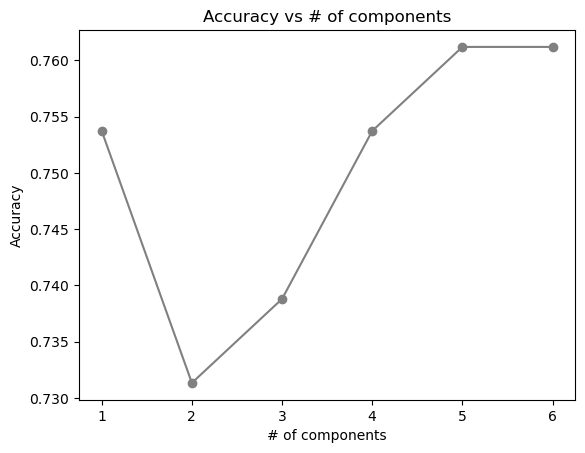

In [40]:
# Put your code here
plt.plot(num_components,accuracyscores,marker='o',color="grey")
plt.title('Accuracy vs # of components')
plt.xlabel('# of components')
plt.ylabel('Accuracy')
plt.show()

**&#9989; Question 6.1 (3 point):** What do you observe about the accuracy as a function of the number of PCA components you use? One goal of using dimension reduction strategies is to develop a model with the fewest features while maximizing the accuracy. Given that motivation, what number of principal components would you choose and why?  

<font size=+3>&#9998;</font> There is a high accuracy using just one component which sharply declines once you add a second, but accuracy steadily increases once more components are added from that point. Given this motivation, I would probably use 5 components since it is the smallest number of components with the greatest relative accuracy rate.

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

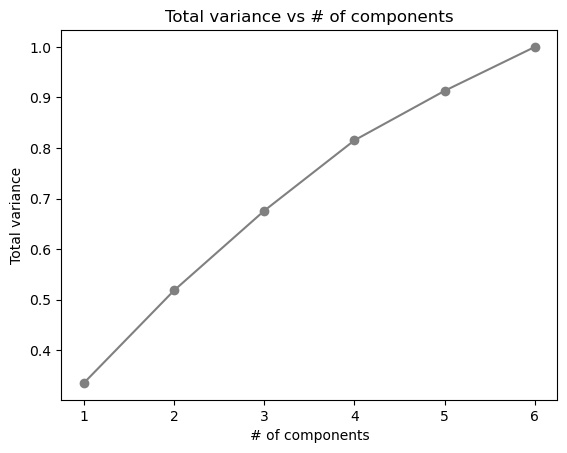

In [41]:
# Put your code here
plt.plot(num_components,evrs,marker='o',color="grey")
plt.title('Total variance vs # of components')
plt.xlabel('# of components')
plt.ylabel('Total variance')
plt.show()

**&#9989; Question 6.2 (1 points):** Based on your answer from question 6.1 and the plot above, what is the explained variance for the number of principal components that you chose?

<font size=+3>&#9998;</font> The explained variance for the principal components I chose is approximately 0.8 based on my answer from 6.1.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier (10 points)

In class you implemented your own perceptron class. Fortunately, there is a perceptron classifier already built into scikit learn, so in this portion of the assignment we will be exploring scikit learn's perceptron


&#9989; **Do this**: 
Run the following cell to import the code from the Perceptron class.

In [42]:
from sklearn.linear_model import Perceptron

**&#9989; Task 7.1 (4 points):** Create an instance of the `Perceptron` object using **alpha=0.01** and **penalty='l2'**. Then, use the `fit()` to train the classifier using the training features and labels from the credit card approval dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

In [44]:
# Put your code here
myperceptron = Perceptron(alpha=0.01, penalty='l2', random_state=1)
myperceptron.fit(x_train, y_train)

perceptronprediction = myperceptron.predict(x_test)
perceptronaccuracy = acc_score(y_test, perceptronprediction)

print("Accuracy:", perceptronaccuracy)

Accuracy: 0.41044776119402987


**&#9989; Question 7.1 (1 points):** How well of job did the Perceptron classifier do on the credit card approval dataset? How does it compare to the SVC model you built in the previous parts of this assignment?

<font size=+3>&#9998;</font> It did an okay job on the credit card approval data set, with a lower accuracy rate than the SVC model from previously in the assignment.

**&#9989; Task 7.2 (4 points):** Now perform a grid search as you did with the support vector classifier earlier in this assignment. Here you will want to search over `penalty` = `l2`, `l1`, `elasticnet` and `alpha`= `0.0001`, `0.001`, `0.01`, and `0.1`. Find and return the best parameters, the confusion matrix, and the classification report. 

In [47]:
# Put your code here
paramgrid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}
myperceptron = Perceptron()
gridsearch2 = GridSearchCV(estimator=myperceptron, param_grid=paramgrid, cv=5)
gridsearch2.fit(x_train, y_train)

bestparams = gridsearch2.best_params_

bestperceptron = gridsearch2.best_estimator_
labelprediction = bestperceptron.predict(x_test)
confusion2 = confusion_matrix(y_test, labelprediction)
classreport2 = classification_report(y_test, labelprediction)

print("Best parameters:", bestparams, "Confusion matrix:", confusion2, 
      "Classification report:", classreport2)

Best parameters: {'alpha': 0.0001, 'penalty': 'elasticnet'} Confusion matrix: [[54 22]
 [12 46]] Classification report:               precision    recall  f1-score   support

           0       0.82      0.71      0.76        76
           1       0.68      0.79      0.73        58

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.76      0.75      0.75       134



**&#9989; Question 7.2 (1 point):** How do these results compare to the results when using a support vector classifier now that we optimized the parameters? Did the perceptron do better or worse? 

<font size=+3>&#9998;</font> The perceptron has a slightly lower average of 75% accuracy versus the SVC model's 77% accuracy, so it performed at almost the same accuracy level when we optimized the parameters.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [1]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/jZyy65R83k" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University